# import packages and libraries

In [ ]:
import numpy as np
import keras
import tensorflow
from keras.datasets import cifar10
from keras import backend as K
from keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dense, BatchNormalization, Activation, MaxPooling2D, CenterCrop
from keras.models import Model
from keras.layers import concatenate,Dropout,Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras import optimizers,regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.initializers import he_normal
from keras.callbacks import LearningRateScheduler, TensorBoard, ModelCheckpoint

# uploading and preparing data

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
#standarlized data
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train, axis=(0, 1, 2, 3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [ ]:
num_classes = 10
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

# implement the New_Alex network

In [ ]:
from keras.layers.convolutional import Conv2DTranspose
def new_alexnet(img_input, classes=10):
 xnet = CenterCrop(28, 28)(img_input)
 xnet = Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform')(xnet)
 xnet = Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform')(xnet)
 xnet = Dropout(0.8)(xnet)
 xnet = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(xnet)
 xnet = Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform')(xnet)
 xnet = Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform')(xnet)
 xnet = Dropout(0.8)(xnet)
 xnet = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(xnet)
 xnet = Conv2DTranspose(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform')(xnet)
 xnet = Dropout(0.5)(xnet)
 xnet = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(xnet)
 xnet = Conv2DTranspose(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform')(xnet)
 xnet = Dropout(0.5)(xnet)
 xnet = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(xnet)
 xnet = Flatten()(xnet)
 xnet = Dense(256,activation='relu')(xnet)
 xnet = Dropout(0.5)(xnet)
 out_model = Dense(classes, activation='softmax')(xnet)
 return out_model

In [ ]:
# show network structure
img_input=Input(shape=(32,32,3))
output = new_alexnet(img_input)
model=Model(img_input,output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 center_crop (CenterCrop)    (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 dropout (Dropout)           (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                             

# fitting New_Alex model

In [ ]:
sgd = tensorflow.keras.optimizers.SGD(learning_rate=.01, momentum=0.9, nesterov=True) 
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
epochs = 120
batch_size = 128
iterations = int(x_train.shape[0]/batch_size)
datagen = ImageDataGenerator(horizontal_flip=True, width_shift_range=0.115,height_shift_range=0.115, fill_mode='constant',cval=0.)
datagen.fit(x_train)
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), steps_per_epoch=iterations, epochs=epochs, callbacks=callbacks_list, validation_data=(x_test, y_test))

Epoch 1/120


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


390/390 [==============================] - 59s 60ms/step - loss: 2.0790 - accuracy: 0.2028 - val_loss: 2.2821 - val_accuracy: 0.1060
Epoch 2/120
390/390 [==============================] - 23s 58ms/step - loss: 1.7359 - accuracy: 0.3464 - val_loss: 2.2318 - val_accuracy: 0.1611
Epoch 3/120
390/390 [==============================] - 23s 58ms/step - loss: 1.5968 - accuracy: 0.4088 - val_loss: 2.2091 - val_accuracy: 0.1867
Epoch 4/120
390/390 [==============================] - 23s 58ms/step - loss: 1.5090 - accuracy: 0.4505 - val_loss: 2.1748 - val_accuracy: 0.1892
Epoch 5/120
390/390 [==============================] - 23s 58ms/step - loss: 1.4450 - accuracy: 0.4747 - val_loss: 2.1435 - val_accuracy: 0.2570
Epoch 6/120
390/390 [==============================] - 23s 58ms/step - loss: 1.3924 - accuracy: 0.4977 - val_loss: 2.1232 - val_accuracy: 0.2251
Epoch 7/120
390/390 [==============================] - 23s 58ms/step - loss: 1.3388 - accuracy: 0.5204 - val_loss: 2.0918 - val_accuracy: 0.21

# generating accuracy and loss plots

Text(0, 0.5, 'acc')

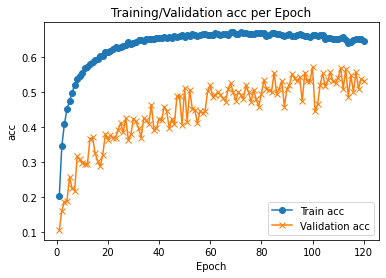

In [ ]:
f, ax = plt.subplots()
ax.plot([None] + model.history.history['accuracy'], 'o-')
ax.plot([None] + model.history.history['val_accuracy'], 'x-')
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'loss')

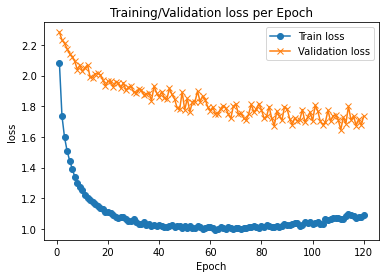

In [ ]:
f, ax = plt.subplots()
ax.plot([None] + model.history.history['loss'], 'o-')
ax.plot([None] + model.history.history['val_loss'], 'x-')
ax.legend(['Train loss', 'Validation loss'], loc = 0)
ax.set_title('Training/Validation loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('loss')

# implememnt restructured New_Alex

In [ ]:
from keras.layers.convolutional import Conv2DTranspose
def new_alexnet1(img_input, classes=10):
 xnet = CenterCrop(28, 28)(img_input)
 xnet = Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform')(xnet)
 #xnet = Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform')(xnet)
 xnet = Dropout(0.5)(xnet)
 xnet = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(xnet)
 xnet = Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform')(xnet)
 #xnet = Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform')(xnet)
 xnet = Dropout(0.3)(xnet)
 xnet = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(xnet)
 xnet = Conv2DTranspose(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform')(xnet)
 xnet = Dropout(0.3)(xnet)
 xnet = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(xnet)
 xnet = Conv2DTranspose(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform')(xnet)
 xnet = Dropout(0.3)(xnet)
 xnet = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(xnet)
 xnet = Flatten()(xnet)
 xnet = Dense(256,activation='relu')(xnet)
 xnet = Dropout(0.3)(xnet)
 out_model = Dense(classes, activation='softmax')(xnet)
 return out_model

In [ ]:
# show network structure
img_input=Input(shape=(32,32,3))
output = new_alexnet1(img_input)
model1=Model(img_input,output)
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 center_crop (CenterCrop)    (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        1792      
                                                                 
 dropout (Dropout)           (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                             

# fitting restructured New_Alex model

In [ ]:
img_input=Input(shape=(32,32,3))
output = new_alexnet1(img_input)
model1=Model(img_input,output)
sgd = tensorflow.keras.optimizers.SGD(learning_rate=.01, momentum=0.9, nesterov=True) 
model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
epochs = 120
batch_size = 128
iterations = int(x_train.shape[0]/batch_size)
datagen = ImageDataGenerator(horizontal_flip=True, width_shift_range=0.115,height_shift_range=0.115, fill_mode='constant',cval=0.)
datagen.fit(x_train)
model1.fit(datagen.flow(x_train, y_train, batch_size=batch_size), steps_per_epoch=iterations, epochs=epochs, callbacks=callbacks_list, validation_data=(x_test, y_test))

Epoch 1/120
390/390 [==============================] - 24s 59ms/step - loss: 1.7071 - accuracy: 0.3685 - val_loss: 1.8346 - val_accuracy: 0.3893
Epoch 2/120
390/390 [==============================] - 22s 56ms/step - loss: 1.3651 - accuracy: 0.5049 - val_loss: 1.5804 - val_accuracy: 0.5120
Epoch 3/120
390/390 [==============================] - 22s 56ms/step - loss: 1.2076 - accuracy: 0.5704 - val_loss: 1.4598 - val_accuracy: 0.5422
Epoch 4/120
390/390 [==============================] - 23s 58ms/step - loss: 1.0989 - accuracy: 0.6116 - val_loss: 1.3280 - val_accuracy: 0.6148
Epoch 5/120
390/390 [==============================] - 22s 56ms/step - loss: 1.0321 - accuracy: 0.6380 - val_loss: 1.2540 - val_accuracy: 0.6474
Epoch 6/120
390/390 [==============================] - 22s 57ms/step - loss: 0.9777 - accuracy: 0.6581 - val_loss: 1.1643 - val_accuracy: 0.6785
Epoch 7/120
390/390 [==============================] - 22s 57ms/step - loss: 0.9341 - accuracy: 0.6734 - val_loss: 1.2273 - val_ac

# generating accuracy plot

Text(0, 0.5, 'acc')

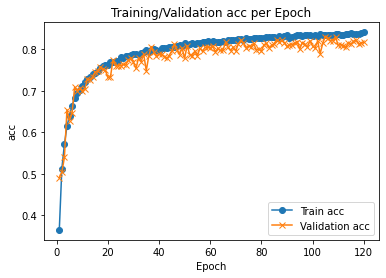

In [ ]:
f, ax = plt.subplots()
ax.plot([None] + model1.history.history['accuracy'], 'o-')
ax.plot([None] + model1.history.history['val_accuracy'], 'x-')
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')